# Lesson 2

## Is it a bear?

In [1]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [2]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
explainable-ai-sdk 1.3.2 requires xai-image-widget, which is not installed.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
tensorflow 2.6.2 requires numpy~=1.19.2, but you have numpy 1.20.3 which is incompatible.
tensorflow 2.6.2 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
tensorflow 2.6.2 requires typing-extensions~=3.7.4, but you have typing-extensions 3.10.0.2 which is incompatible.
tensorflow 2.6.2 requires wrapt~=1.12.1, but you have wrapt 1.13.3 which is incompatible.
tensorflow-transform 1.5.0 requires absl-py<0.13,>=0.9, but you have absl-py 0.15.0 which is incompatible.
tensorflow-transform 1.5.0 requires numpy<1.20,>=1.16, but you have numpy 1.20.3 which is incompatible.


In [3]:
# use the same codes from lesson 1 to doawload images from Duckduckgo by searching a term
from fastcore.all import *
import time
import json

def search_images(term, max_images=200):
    url = 'https://duckduckgo.com/'
    res = urlread(url,data={'q':term})
    searchObj = re.search(r'vqd=([\d-]+)\&', res)
    requestUrl = url + 'i.js'
    params = dict(l='us-en', o='json', q=term, vqd=searchObj.group(1), f=',,,', p='1', v7exp='a')    
    headers = dict( referer='https://duckduckgo.com/' )
    urls,data = set(),{'next':1}
    while len(urls)<max_images and 'next' in data:
        res = urlread(requestUrl, data=params, headers=headers)
        data = json.loads(res) if res else {}
        urls.update(L(data['results']).itemgot('image'))
        requestUrl = url + data['next']
        time.sleep(0.2)
    return L(urls)[:max_images]

In [4]:
# see how many images can be downloaded
results = search_images('grizzly bear',  max_images=200)
ims = results.attrgot('contentUrl')
len(ims)

200

In [5]:
# get the first url
results[0]

'https://cdn.britannica.com/19/186719-050-887A6F2C/Grizzly-bear-Rocky-Mountains-Wyoming.jpg'

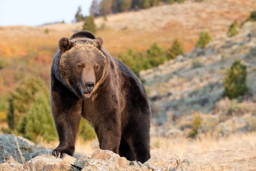

In [6]:
# download the first url and open the image
from fastdownload import download_url
download_url(search_images('grizzly bear', max_images=1)[0], 'grizzly_bear.jpg', show_progress=False)
from fastai.vision.all import *
Image.open('grizzly_bear.jpg').to_thumb(256,256)

In [7]:
# download images related to "grizzly", "black", and "teddy" bear
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [8]:
# download the images
from time import sleep
for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} bear photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    resize_images(path/o, max_size=400, dest=path/o)

In [14]:
# check the parent folder structure
!ls

bears  grizzly_bear.jpg


In [15]:
# check the subcategory structure
!ls bears

black  grizzly	teddy


In [12]:
# check the first 5 images in each category
# teddy
!ls bears/teddy | head -5

0259c239-319c-415f-985e-6c13c2f6b1c0.jpg
030144cf-066b-4ca1-8423-8c6a3f94061a.jpg
038b2c42-68a9-4f43-9cc0-7328cbd3aa16.jpg
04daec99-cf86-4f6a-bf87-c05ee3ce2635.jpg
08032459-a7be-4768-9ffc-f3e67bf61020.jpeg


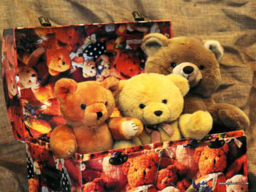

In [13]:
# test teddy bear photos
Image.open('bears/teddy/0259c239-319c-415f-985e-6c13c2f6b1c0.jpg').to_thumb(256,256)

In [20]:
# grizzly 
!ls bears/grizzly | head -5

007f97a0-3977-409d-8eaa-8232cb3dc2b1.jpg
00a2e784-38d5-4841-9580-0882d5a78e7e.jpg
01bf1552-964b-4e0d-9026-c94bc44d16c7.jpg
03c4e563-c2d5-43be-aaa1-f87480a974dd.jpg
05639101-7305-4919-84dd-c93009bbddeb.jpg


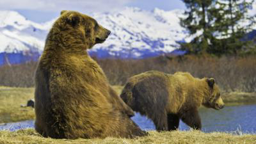

In [18]:
# test grizzly 
Image.open('bears/grizzly/007f97a0-3977-409d-8eaa-8232cb3dc2b1.jpg').to_thumb(256,256)

In [21]:
# black
!ls bears/black | head -5

029f84c5-c5bc-4bc1-95cf-37b0b4c28b42.jpg
033fbce0-16a0-496d-8c75-a9250bc96445.jpg
046dc229-2ac1-4794-a661-924814300fa5.jpg
05034af7-bee4-48ca-8062-b50973076377.jpg
0544bc7d-09a4-4074-8f4c-fd6f50699484.jpg


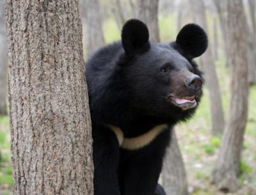

In [22]:
# test black
Image.open('bears/black/029f84c5-c5bc-4bc1-95cf-37b0b4c28b42.jpg').to_thumb(256,256)

In [23]:
# get image file path
fns = get_image_files(path)
fns

(#564) [Path('bears/grizzly/66490595-13b3-434b-a3eb-dfbe0bcd43f9.jpg'),Path('bears/grizzly/7f4126d4-597b-4714-a999-0fadf16a839f.jpg'),Path('bears/grizzly/73d80d33-2645-4074-97a2-8d5cca941fce.jpg'),Path('bears/grizzly/f94e9c2b-7d11-4700-aa70-2a3e0590c21c.jpg'),Path('bears/grizzly/830569fb-eae3-4089-8499-c2b40db82ddd.jpg'),Path('bears/grizzly/b2794ba5-69f1-43b8-b01d-64f178d553ee.jpg'),Path('bears/grizzly/d3632d32-a4a6-469f-8083-011903f4f9a2.JPG'),Path('bears/grizzly/4b3db464-9aad-4e51-872a-8e11c7556973.jpg'),Path('bears/grizzly/4c15187e-4216-4334-bf62-40307077de62.jpg'),Path('bears/grizzly/921cfce7-4f06-4f5e-b093-7c56d4f233e6.jpg')...]

In [24]:
# verify images
failed = verify_images(fns)
failed

(#12) [Path('bears/grizzly/cfe45b1f-394d-4524-8f13-00ce2cf09063.jpg'),Path('bears/grizzly/c94df8c0-f709-4819-a2ba-147aa0146e87.jpg'),Path('bears/grizzly/5b23d32f-e292-46a0-ab8b-35c2db0b25df.jpg'),Path('bears/grizzly/4dc8ed00-9e66-4fc1-9011-00572e7f455f.jpg'),Path('bears/black/737f92cc-bd28-4225-aedc-8e8e75cae178.jpg'),Path('bears/teddy/52dc4e84-448b-4b87-b3f9-d81044393151.jpg'),Path('bears/teddy/b281b9cc-0f05-495e-89b5-61d14d583e3c.jpg'),Path('bears/teddy/5c164841-400b-4be3-ae75-e4929552f3ec.jpg'),Path('bears/teddy/b54df6d6-7f16-4b77-89c9-af325fdd404d.jpg'),Path('bears/teddy/1864b255-8196-49bc-abfd-4b160eb396d0.jpg')...]

In [30]:
# remove these failed images
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#12) [None,None,None,None,None,None,None,None,None,None...]

In [31]:
# create a DataBlock
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [36]:
# load the data
dls = bears.dataloaders(path)

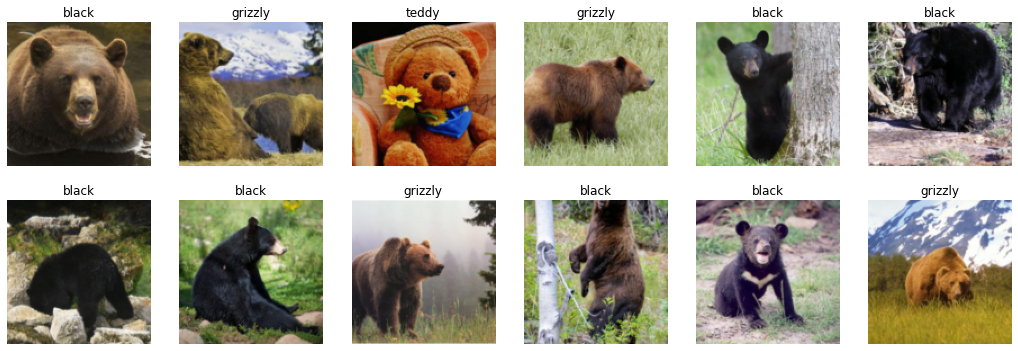

In [37]:
# show batch images
dls.valid.show_batch(max_n=12, nrows=2)

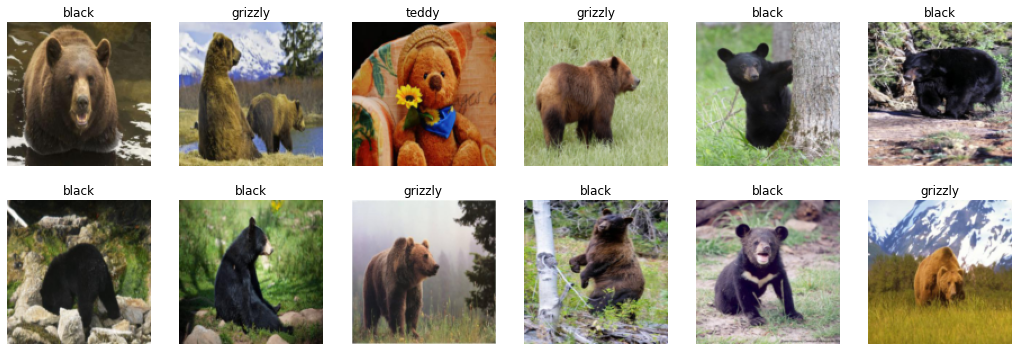

In [38]:
# Squish images
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=12, nrows=2)

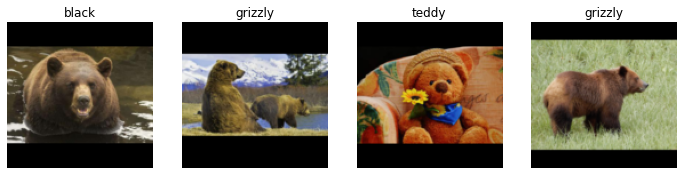

In [39]:
# Pad images
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

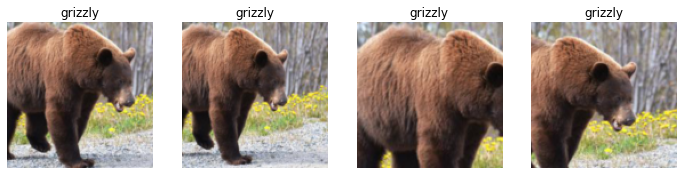

In [40]:
# Random Resize Images
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [47]:
# !pip install magma

In [51]:
# from magma import *

In [52]:
# bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
# dls = bears.dataloaders(path)
# dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [54]:
# bears = bears.new(
#     item_tfms=RandomResizedCrop(224, min_scale=0.5),
#     batch_tfms=aug_transforms())
# dls = bears.dataloaders(path)

In [55]:
# train the model
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.413380,0.653289,0.154545,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.321975,0.307423,0.072727,00:01
1,0.298345,0.267515,0.045455,00:01
2,0.245981,0.245170,0.045455,00:01
3,0.217713,0.243147,0.045455,00:01


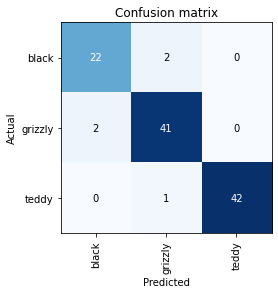

In [56]:
# confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

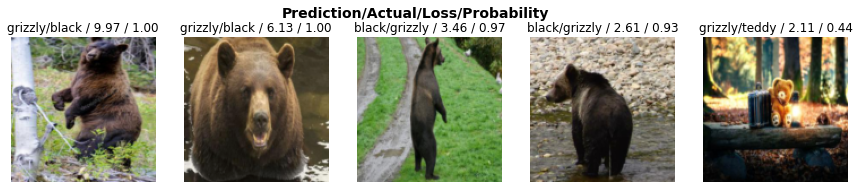

In [57]:
# images most misclassified
interp.plot_top_losses(5, nrows=1)

In [58]:
from fastai.vision.widgets import *

In [59]:
#hide_output
# clean images which are most misclassified
cleaner = ImageClassifierCleaner(learn)
cleaner

In [60]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)